# Example 5, gradients

For this example we will show how this code can allow gradients involving the contours of a function can be to be taken with respect to the parameters of a function.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import jax.numpy as jnp

jax.config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from jax_zero_contour import ZeroSolver

To demonstrate how gradients work let's write a function that takes in a position along with a couple of free parameters.  The shape of the zero contours will change depending on the values of these parameters.

In [3]:
def f(p, A, B):
    return A * ((p + B)**4 - 30 * p**2 - 20 * p).sum(axis=0) + 2.0

Next we need to write a function that takes in these parameters and calculates some quantity of interest using the contours.  For this example we will calculate the centroid of each contour.  Inside this function we just need to `jax.tree_util.Partial` our input parameters into the function before proceeding as normal.

```{note}
For plotting reasons we will also return the calculated contours, when taking the jacobian later we will use teh `has_aux=True` to indicate the function returns this extra data.
```

In [4]:
zs = ZeroSolver()

In [5]:
def centroids(A, B):
    _f = jax.tree_util.Partial(f, A=A, B=B)
    init_guess = jnp.array([[-2.0, 0.0], [4.0, 4.0]])
    paths, _ = zs.zero_contour_finder(
        _f,
        init_guess
    )
    return jnp.nanmean(paths['path'], axis=1), paths

As a test we can see what the output looks like for a given set of values for `A` and `B`.

In [10]:
center, paths = centroids(0.01, 0.5)

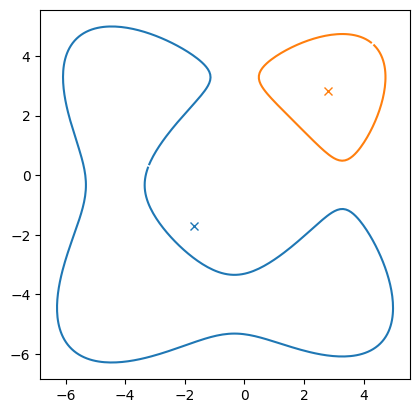

In [24]:
plt.plot(*paths['path'].T)
plt.plot(*center[0].T, 'x', color='C0')
plt.plot(*center[1].T, 'x', color='C1')
plt.gca().set_aspect(1);

As with any jax function we can evaluate the jacobian with respect to the inputs:

In [22]:
grad, paths = jax.jacobian(centroids, argnums=(0, 1), has_aux=True)(0.01, 0.5)
grad

(Array([[ 17.77701254,  17.91892068],
        [-39.5424976 , -39.5436664 ]], dtype=float64, weak_type=True),
 Array([[-0.75541393, -0.75484016],
        [-0.2485473 , -0.24775855]], dtype=float64, weak_type=True))